In [16]:
import pandas as pd
import os
from surprise import Dataset
from surprise import evaluate, print_perf
from surprise import Dataset,Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV

In [3]:
df_train = pd.read_excel("C:\\Users\\Sadie\\Desktop\\Major_Research\\data\\movie_sentimental_train.xlsx",encoding='latin-1')
df_test = pd.read_excel("C:\\Users\\Sadie\\Desktop\\Major_Research\\data\\movie_sentimental_test.xlsx",encoding='latin-1')

In [4]:
df_train.count()

file_name       2526
title           2526
user            2526
comment         2526
Final Rating    2526
sentimental     2526
dtype: int64

In [5]:
df_test.count()

file_name       631
title           631
user            631
comment         631
Final Rating    631
sentimental     631
dtype: int64

In [8]:
reader = Reader(rating_scale=(-1, 1))
#sentimental score
train_data_sentimental = Dataset.load_from_df(df_train[['user', 'title', 'sentimental']], reader)
test_data_sentimental = Dataset.load_from_df(df_test[['user', 'title', 'sentimental']], reader)

In [10]:
#Compare KNNBaseline, KNNBasic, KNNWitthMeans
#KNNBaseline
cross_validate(KNNBaseline(), train_data_sentimental, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0791  0.0764  0.0731  0.0763  0.0767  0.0763  0.0019  
MAE (testset)     0.0607  0.0579  0.0575  0.0607  0.0581  0.0590  0.0014  
Fit time          0.01    0.02    0.02    0.00    0.00    0.01    0.01    
Test time         0.02    0.02    0.00    0.02    0.02    0.01    0.01    


{'fit_time': (0.0065059661865234375,
  0.015622854232788086,
  0.015622854232788086,
  0.0,
  0.0),
 'test_mae': array([0.06074574, 0.05793562, 0.05752828, 0.06068511, 0.05809563]),
 'test_rmse': array([0.07911006, 0.0764245 , 0.07309972, 0.07627733, 0.0766831 ]),
 'test_time': (0.015631914138793945,
  0.015627622604370117,
  0.0,
  0.020634889602661133,
  0.01562643051147461)}

In [11]:
#KNNBasic
cross_validate(KNNBasic(), train_data_sentimental, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0763  0.0757  0.0773  0.0833  0.0807  0.0787  0.0029  
MAE (testset)     0.0597  0.0592  0.0595  0.0644  0.0623  0.0610  0.0020  
Fit time          0.02    0.00    0.00    0.00    0.00    0.00    0.01    
Test time         0.00    0.02    0.02    0.00    0.00    0.01    0.01    


{'fit_time': (0.015605688095092773, 0.0, 0.0, 0.0, 0.0),
 'test_mae': array([0.05972077, 0.05924583, 0.05950985, 0.06436637, 0.06229793]),
 'test_rmse': array([0.07634088, 0.07571137, 0.07731124, 0.08329735, 0.08065788]),
 'test_time': (0.0, 0.015624761581420898, 0.015623807907104492, 0.0, 0.0)}

In [12]:
#KNNWithMeans
cross_validate(KNNWithMeans(), train_data_sentimental, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0746  0.0782  0.0801  0.0792  0.0799  0.0784  0.0020  
MAE (testset)     0.0572  0.0605  0.0628  0.0622  0.0622  0.0610  0.0020  
Fit time          0.00    0.00    0.00    0.02    0.00    0.00    0.01    
Test time         0.00    0.00    0.00    0.00    0.02    0.00    0.01    


{'fit_time': (0.0, 0.0, 0.0, 0.018149852752685547, 0.0),
 'test_mae': array([0.05721007, 0.06047446, 0.06279786, 0.06224722, 0.06219953]),
 'test_rmse': array([0.07461987, 0.07820295, 0.0801397 , 0.0791789 , 0.0798633 ]),
 'test_time': (0.0, 0.0, 0.0, 0.004002571105957031, 0.015630483627319336)}

In [13]:
#deside use KNNBaseline
algo = KNNBaseline()

In [14]:
#apply to actual rating
train_data_actual = Dataset.load_from_df(df_train[['user', 'title', 'Final Rating']], reader)
test_data_actual = Dataset.load_from_df(df_test[['user', 'title', 'Final Rating']], reader)

In [15]:
cross_validate(algo, train_data_actual, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.4563  0.4191  0.4477  0.4273  0.4141  0.4329  0.0164  
MAE (testset)     0.3671  0.3310  0.3564  0.3407  0.3322  0.3455  0.0141  
Fit time          0.02    0.03    0.02    0.02    0.02    0.02    0.01    
Test time         0.02    0.00    0.02    0.00    0.02    0.01    0.01    


{'fit_time': (0.015627145767211914,
  0.031255245208740234,
  0.015625715255737305,
  0.018513917922973633,
  0.015625476837158203),
 'test_mae': array([0.36707781, 0.33095262, 0.35637463, 0.34072943, 0.33223442]),
 'test_rmse': array([0.45633772, 0.41907652, 0.44765954, 0.42733995, 0.41406472]),
 'test_time': (0.021633148193359375,
  0.0,
  0.015625476837158203,
  0.003001689910888672,
  0.015623331069946289)}

In [18]:
#For Sentimental Score

#Find the best algo by tuning Parameters for KNNBaseline
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005]}
grid_search = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=5)
grid_search.fit(train_data_sentimental)
best_algo = grid_search.best_estimator['rmse']

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

In [20]:
#reformat train and test dataset
train_data_sentimental_format = train_data_sentimental.build_full_trainset()
test_data_sentimental_format = train_test_split(test_data_sentimental, test_size=1.0)[1]

In [24]:
#Train and Apply to Test
best_algo.fit(train_data_sentimental_format)
predictions = best_algo.test(test_data_sentimental_format)
predictions

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


[Prediction(uid='Homer Yen', iid='Review for Love & Basketball (2000)', r_ui=0.0838102725366876, est=0.12061688821636896, details={'was_impossible': False}),
 Prediction(uid='Mark R. Leeper', iid="Review for What's Love Got to Do with It (1993)", r_ui=0.146590909090909, est=0.11340811283242891, details={'was_impossible': False}),
 Prediction(uid='Dennis Schwartz', iid='Review for Dead Man (1995)', r_ui=0.08268208399787325, est=0.024191623005604068, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='Dennis Schwartz', iid='Review for Jurk, De (1996)', r_ui=0.0027836341148028687, est=0.0808518927118409, details={'was_impossible': False}),
 Prediction(uid='Eugene Novikov', iid='Review for Girl, Interrupted (1999)', r_ui=0.03294549266247371, est=0.1009778281025624, details={'was_impossible': False}),
 Prediction(uid='Mark R. Leeper', iid="Review for Eve's Bayou (1997)", r_ui=0.1513626126126124, est=0.0967921807714327, details={'actual_k': 1, 'was_impossible': False}),
 Pred

In [25]:
# Then compute RMSE
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.0711


0.07107530869960772

In [26]:
df_knn = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details']) 

In [35]:
df_knn.head()

,uid,iid,rui,est,details
0,Homer Yen,Review for Love & Basketball (2000),0.083810,0.120617,{'was_impossible': False}
1,Mark R. Leeper,Review for What's Love Got to Do with It (1993),0.146591,0.113408,{'was_impossible': False}
2,Dennis Schwartz,Review for Dead Man (1995),0.082682,0.024192,"{'actual_k': 1, 'was_impossible': False}"
3,Dennis Schwartz,"Review for Jurk, De (1996)",0.002784,0.080852,{'was_impossible': False}
4,Eugene Novikov,"Review for Girl, Interrupted (1999)",0.032945,0.100978,{'was_impossible': False}


<IPython.core.display.Javascript object>


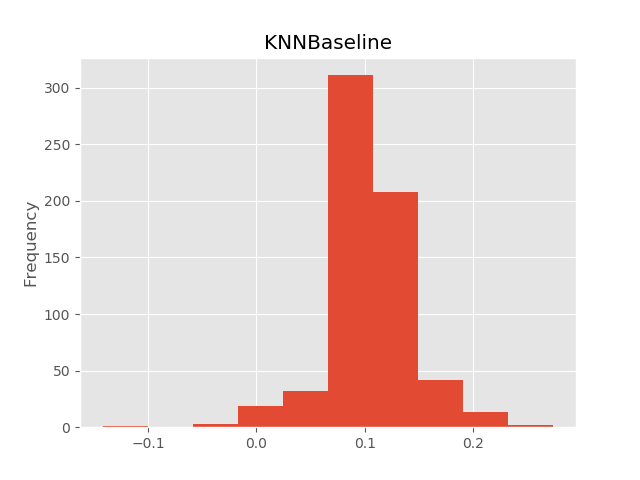

In [33]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
matplotlib.style.use('ggplot')
plt.subplots(1)
df_knn.est.plot(kind='hist', title='KNNBaseline')

In [36]:
from collections import defaultdict

from surprise import Dataset
from surprise import SVD
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [53]:
from surprise.model_selection import KFold
precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=0)

In [54]:
avg_prec = sum(prec for prec in precisions.values()) / len(precisions)
avg_rec = sum(rec for rec in recalls.values()) / len(recalls)
F_Measure = 2 / ((1/avg_prec)+(1/avg_rec)) 

In [55]:
F_Measure

0.897993830930083

In [44]:
#For actual rating

#Find the best algo by tuning Parameters for KNNBaseline
grid_search_actual = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=5)
grid_search_actual.fit(train_data_actual)
best_algo_actual = grid_search.best_estimator['rmse']

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

In [45]:
#reformat train and test dataset
train_data_actual_format = train_data_actual.build_full_trainset()
test_data_actual_format = train_test_split(test_data_actual, test_size=1.0)[1]

In [46]:
#Train and Apply to Test
best_algo_actual.fit(train_data_actual_format)
predictions_actual = best_algo_actual.test(test_data_actual_format)
predictions_actual

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


[Prediction(uid='Michael J. Legeros', iid='Review for Blue in the Face (1995)', r_ui=-0.2727272727272727, est=-0.017168074445288894, details={'was_impossible': False}),
 Prediction(uid='Mark R. Leeper', iid='Review for Dead Ringers (1988)', r_ui=0.0, est=0.2779925776646013, details={'was_impossible': False}),
 Prediction(uid='Homer Yen', iid='Review for Eyes Wide Shut (1999)', r_ui=0.4545454545454546, est=0.6171222403255534, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='Homer Yen', iid='Review for Rush Hour 2 (2001)', r_ui=0.09090909090909083, est=0.057386511108857174, details={'was_impossible': False}),
 Prediction(uid='Chuck Dowling', iid='Review for Bean (1997)', r_ui=-0.5, est=-0.8914362693704634, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='Homer Yen', iid='Review for World Is Not Enough, The (1999)', r_ui=-0.09090909090909083, est=-0.14756731165855563, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='Bryant Frazer', 

In [59]:
precisions_actual, recalls_actual = precision_recall_at_k(predictions_actual, k=5, threshold=0)

In [60]:
avg_prec_actual = sum(prec for prec in precisions_actual.values()) / len(precisions_actual)
avg_rec_actual = sum(rec for rec in recalls_actual.values()) / len(recalls_actual)
F_Measure_actual = 2 / ((1/avg_prec_actual)+(1/avg_rec_actual)) 

In [61]:
F_Measure_actual

0.7034146387250454